# Decycle inverse Fisher and Sinewave indicator signaling

In [48]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 7

In [49]:
# First import useful tools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

import elhers_indicators as ei

In [50]:
def trigger_idx(pd_series, threshold, tol):
    cond_1 = (pd_series.shift() < threshold) & (pd_series > threshold + tol)
    cond_2 = (pd_series.shift() > threshold) & (pd_series < threshold - tol)

    cond_3 = (pd_series.shift() < -threshold) & (pd_series > -threshold + tol)
    cond_4 = (pd_series.shift() > -threshold) & (pd_series < -threshold - tol)
    return list([cond_1, cond_2, cond_3, cond_4])

In [59]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=0B9-kA56h5JCMbXptY0kyVXZXaUU',
                 index_col=0, parse_dates=True)
#data = pd.read_csv('https://drive.google.com/uc?export=download&id=0B9-kA56h5JCMU2w4d3JmN1hWZW8',
#                 index_col=0, parse_dates=True)
time = data.index
price = data.CLOSE

In [60]:
decycle = ei.decycle(price, 8)
inv_fisher_decycle = ei.fisher_inverse(decycle, 10)
sine_indicator = ei.sinewave_indicator(price, 120)

In [61]:
df = pd.DataFrame(np.transpose(np.vstack((price, decycle, inv_fisher_decycle, sine_indicator))),
                  index=time,
                  columns=['Price', 'Decycle', 'InvFisherDecycle',
                           'SinewaveIndicator'])

##Signaling performance

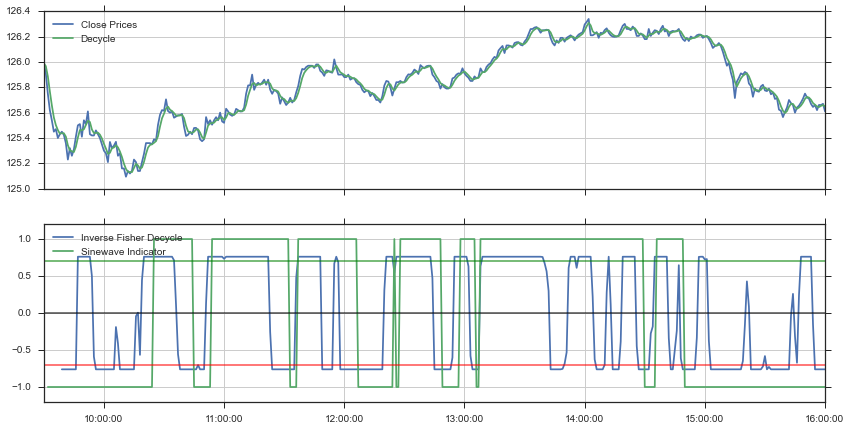

In [62]:
# Plotting
threshold = 0.7

f, ax = plt.subplots(2, sharex=True)

ax[0].plot(time, df.Price, label='Close Prices')
ax[0].plot(time, df.Decycle, label='Decycle')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(time, df.InvFisherDecycle, label='Inverse Fisher Decycle')
ax[1].plot(time, df.SinewaveIndicator, label='Sinewave Indicator')
ax[1].set_ylim([-1.2, 1.2])
ax[1].axhline(y=threshold, color='green', alpha=0.6)
ax[1].axhline(y=-threshold, color='red', alpha=0.6)
ax[1].axhline(y=0, color='black', alpha=0.6)
ax[1].legend(loc='upper left')
ax[1].grid()

In [55]:
ax[0].plot(time[long_signal], df.Price[long_signal], linestyle='None', marker='^', 
           color='g', markersize=10, label='Long')
ax[0].plot(time[short_signal], df.Price[short_signal], linestyle='None', marker='v',
           color='r', markersize=10, label='Short')

NameError: name 'long_signal' is not defined